In [12]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs
%matplotlib inline
infile = 'titanic_data.csv'
fulldata = pd.read_csv(infile)
display(fulldata.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
outcomes = fulldata['Survived']
data = fulldata.drop("Survived", axis = 1)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
def accurate_score(truth, pred):
    if(len(truth) == len(pred)):
        return ("Predictions have an accuracy of {:.2f}% ".format((truth == pred).mean()*100))
    else:
        return "Number of predictions exceeds the number of outcomes"
#predictions  = pd.Series(np.array([1,0,1,0,1]))
predictions  = pd.Series(np.ones(5, dtype = int))
accurate_score(outcomes[:5],predictions)

'Predictions have an accuracy of 60.00% '

In [15]:
def predictions_0(data):
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
        
    return pd.Series(predictions)

predictions = predictions_0(data)
print(accurate_score(outcomes, predictions))

Predictions have an accuracy of 61.62% 


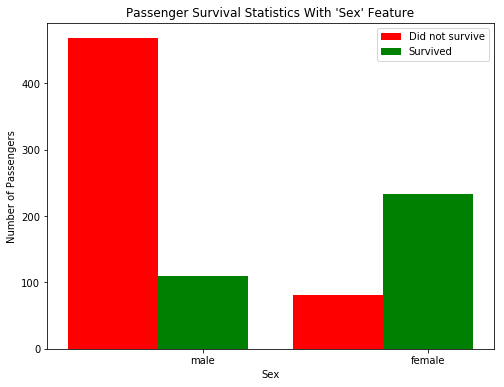

In [16]:
vs.survival_stats(data, outcomes, "Sex")

In [17]:
def predictions_1(data):
    """Model with one feature: 
        - Predict a passenger survived if they were female"""
    predictions = []
    for _, passengers in data.iterrows():
        if(passengers.Sex == "female"):
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

predictions = predictions_1(data)
print(accurate_score(outcomes, predictions))

Predictions have an accuracy of 78.68% 


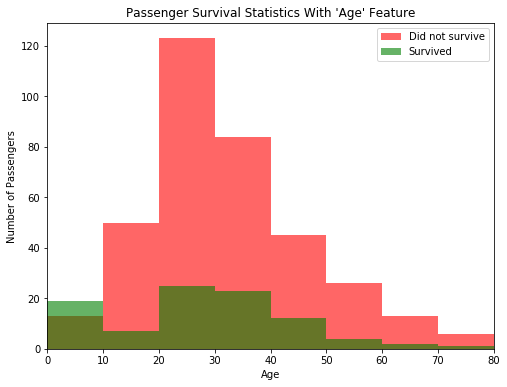

In [18]:
vs.survival_stats(data, outcomes, "Age", ["Sex == 'male'"])

In [19]:
def predictions_2(data):
    """Model with 2 features: 
        - 1. Predict a passenger survives if they are females
          2. Predict a male passenger survives if they have age less than 10"""
    predictions = []
    for _, passengers in data.iterrows():
        if(passengers.Sex == 'female'):
            predictions.append(1)
        else:
            if(passengers.Sex == 'male' and passengers.Age < 10):
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)
    
predictions = predictions_2(data)
print(accurate_score(outcomes, predictions))

Predictions have an accuracy of 79.35% 


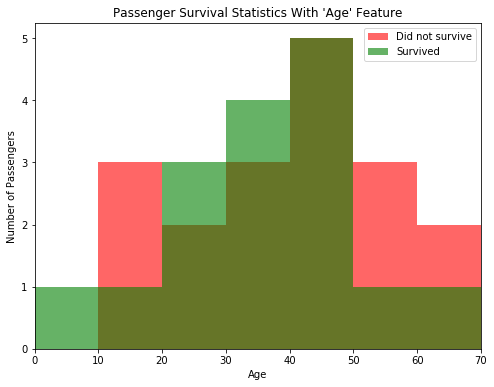

In [20]:
vs.survival_stats(data, outcomes,"Age", ["Sex == male", "Pclass == 1", "SibSp > 0"])

In [27]:
def predictions_3(data):
    """Model with atleast three features
        1. if female survived
        2. if male and less than 10 survived
        3. if male and age is between 10-18 and Pclass = 1 then survived """
    predictions = []
    for _, passenger in data.iterrows():
        if(passenger.Sex == "female"):
            if(passenger.Pclass == 3):
                if(passenger.Embarked == "S"):
                    predictions.append(0)
                elif(passenger.Age > 40):
                    predictions.append(0)
                else:
                    predictions.append(1)        
            else:
                if(passenger.Pclass == 1 and passenger.Age < 10):
                    predictions.append(0)
                else:
                    predictions.append(1)
        else:
            if(passenger.Age < 10):
                if(passenger.Embarked == "Q"):
                    predictions.append(0)
                else:
                    predictions.append(1)
            elif(passenger.Pclass == 1):
                if(passenger.Age < 18):
                    predictions.append(1)
                elif(passenger.SibSp > 0 and passenger.Age > 20 and passenger.Age < 50):
                    predictions.append(1)
                else:
                    predictions.append(0)
            else:
                if(passenger.Age > 40 and passenger.Embarked == "C" and passenger.SibSp > 0):
                    predictions.append(1)
                else:
                    predictions.append(0)
    return pd.Series(predictions)

predictions = predictions_3(data)
print(accurate_score(outcomes, predictions))
    

Predictions have an accuracy of 82.94% 
